In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kakr-4th-competition/train.csv
/kaggle/input/kakr-4th-competition/test.csv
/kaggle/input/kakr-4th-competition/sample_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/kakr-4th-competition/train.csv')
test = pd.read_csv('/kaggle/input/kakr-4th-competition/test.csv')
sample = pd.read_csv('/kaggle/input/kakr-4th-competition/sample_submission.csv')

In [3]:
display(train.head())
display(test.head())

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


In [8]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


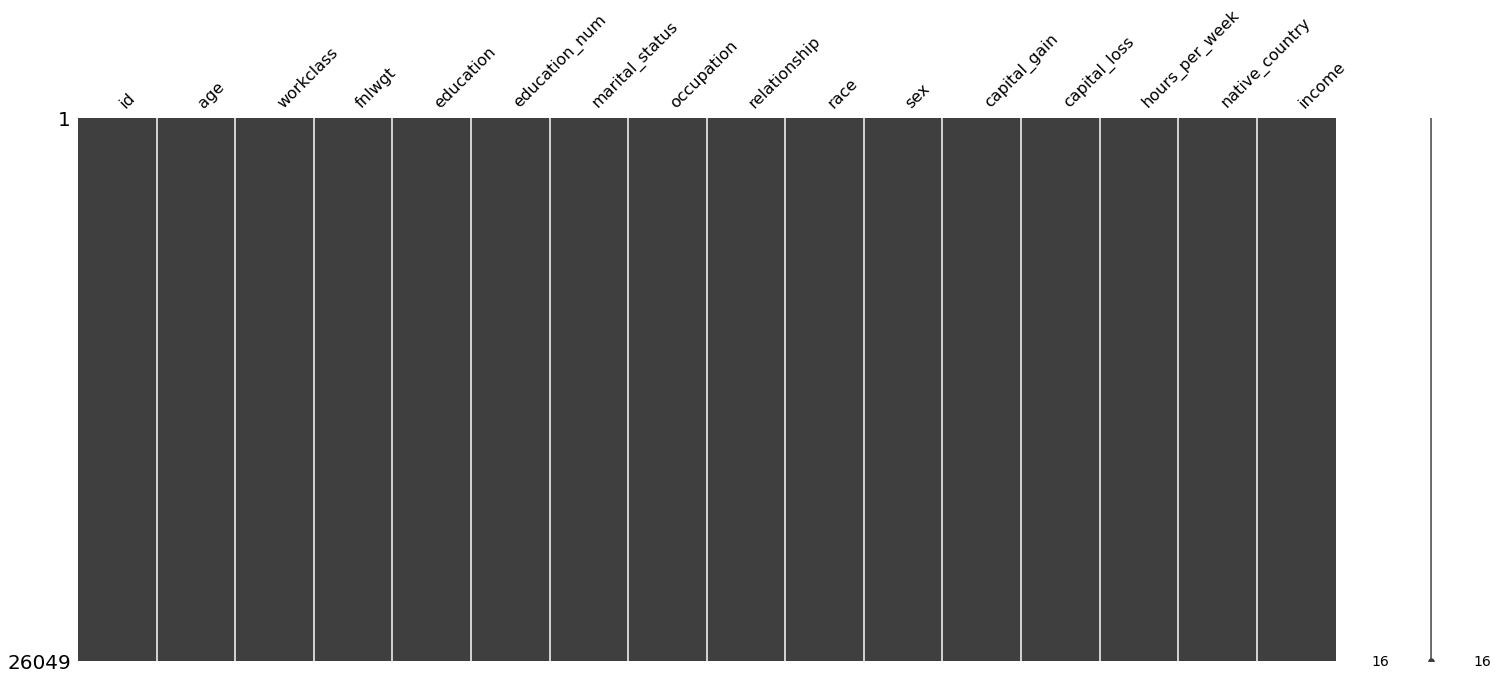

In [9]:
msno.matrix(train)

In [10]:
train['workclass'].value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

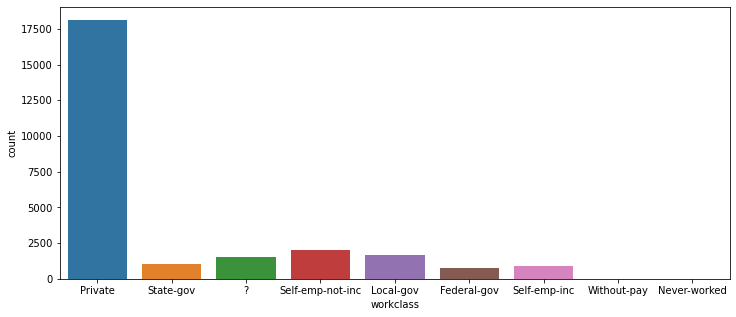

In [12]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
sns.countplot(data=train, x='workclass')
plt.show()

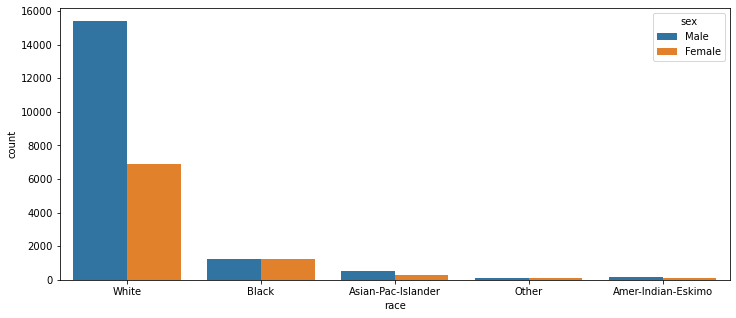

In [14]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
sns.countplot(data=train, x='race',hue='sex')   # hue 색상
plt.show()

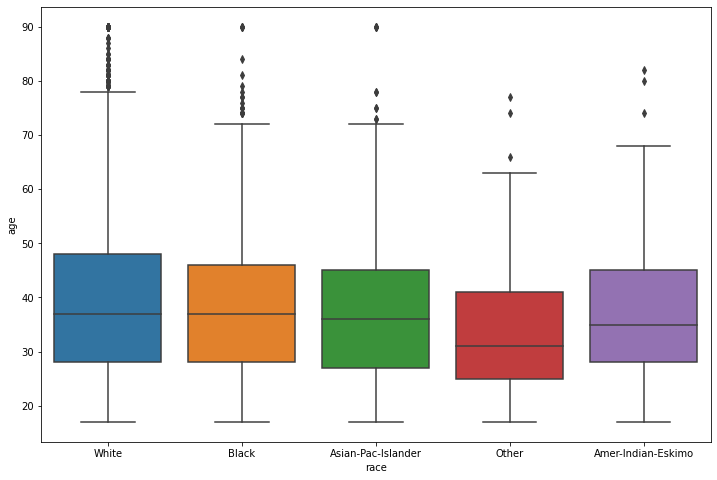

In [18]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.boxplot(data=train, x='race',y = 'age')
plt.show()

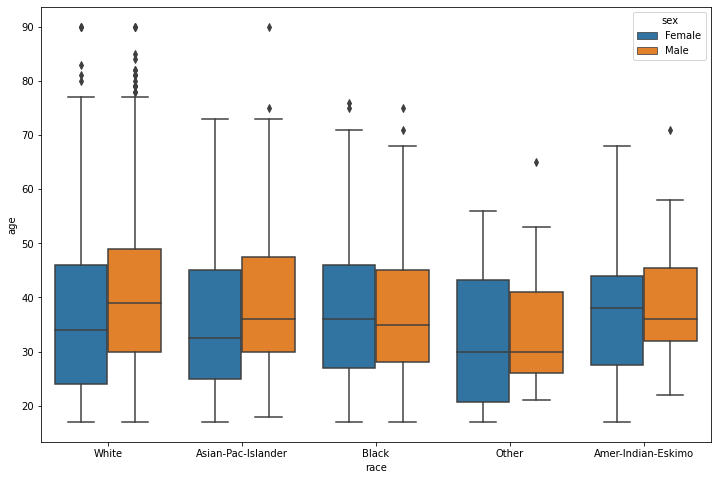

In [20]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.boxplot(data=test, x='race',y = 'age',hue='sex')
plt.show()

In [23]:
corr = train.corr()

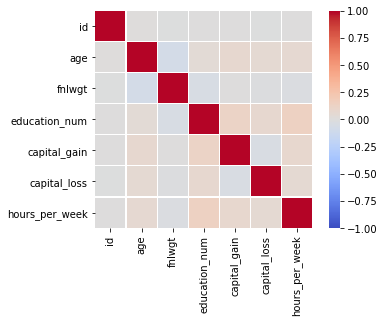

In [29]:
sns.heatmap(corr, square=True, linewidth=0.1, cmap='coolwarm',
           vmax=1.0, vmin=-1.0)

In [31]:
!pip install dabl

     |████████████████████████████████| 566 kB 585 kB/s eta 0:00:01
  Created wheel for dabl: filename=dabl-0.1.9-py3-none-any.whl size=572788 sha256=c6e25aed768ddedc7840fefb18e9779890fe3254ea4bbc723805f30cba0ef7eb
  Stored in directory: /root/.cache/pip/wheels/aa/38/8f/66d5e159658b37cb0b8f9176a9f584f14bcd5ea0c1e96011bf
Successfully built dabl


In [34]:
import dabl
dabl.detect_types(train,target_col='income')

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
id,False,False,False,False,False,False,True
age,False,False,True,False,False,False,False
workclass,False,False,False,True,False,False,False
fnlwgt,True,False,False,False,False,False,False
education,False,False,False,True,False,False,False
education_num,False,False,True,False,False,False,False
marital_status,False,False,False,True,False,False,False
occupation,False,False,False,True,False,False,False
relationship,False,False,False,True,False,False,False
race,False,False,False,True,False,False,False


In [39]:
types = dabl.detect_types(train,target_col='income')

In [40]:
print('#####categorical values#####')
for i in type.loc(types['categorical']==True):
    print(i,end=',')

#####categorical values#####


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [66]:
ttt = types[types['categorical']==True].iloc[:,:0]
types[types['categorical']==True].iloc[:,:0]

""
workclass
education
marital_status
occupation
relationship
race
sex
native_country
income


In [78]:
for i in ttt.index:
    print(i)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [46]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
